# Joshua Krachman's Quiz 4
#Question #1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
from sklearn import linear_model
from sklearn import datasets

! if [ ! -e kirby21.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi

dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")

Ltel = dat.volume[dat.roi == 'Telencephalon_L'][dat.type == 1].to_numpy()
Rtel = dat.volume[dat.roi == 'Telencephalon_R'][dat.type == 1].to_numpy()
CSF = dat.volume[dat.roi == 'CSF'][dat.type == 1].to_numpy()
CSF = np.squeeze(CSF)

dat.head(4)

--2020-03-23 22:16:19--  https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1611966 (1.5M) [text/plain]
Saving to: ‘kirby21.csv’

kirby21.csv         100%[===================>]   1.54M  --.-KB/s    in 0.1s    

2020-03-23 22:16:19 (14.5 MB/s) - ‘kirby21.csv’ saved [1611966/1611966]



,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519


In [2]:
import statsmodels.api as sm
x = np.stack((Ltel, Rtel), -1)
x = sm.add_constant(x)


model = sm.OLS(CSF, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     2.941
Date:                Mon, 23 Mar 2020   Prob (F-statistic):             0.0800
Time:                        22:16:20   Log-Likelihood:                -223.51
No. Observations:                  20   AIC:                             453.0
Df Residuals:                      17   BIC:                             456.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.287e+04    5.1e+04     -0.449      0.659    -1.3e+05    8.47e+04
x1             1.9498      1.092      1.785      0.092      -0.354       4.254
x2            -1.7003      1.042     -1.632      0.121      -3.898       0.497
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   2.521
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.228
Skew:                          -0.037   Prob(JB):                        0.892
Kurtosis:                       2.482   Cond. No.                     8.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
Linmod = linear_model.LinearRegression()
model = Linmod.fit(x,CSF)
Linmod.coef_
print('B0=',Linmod.coef_[0])
print('B1=',Linmod.coef_[1])
print('B2=',Linmod.coef_[2])
print('B1 is associated with the volume of the left telencephelon.')
print('B2 is associated with the volume of the right telencephelon.')
print('Interpretation of B1: For every single increase in Left Telecephelon you get a 1.9498 times increase CSF.')
print('Interpretation of B2: For every single increase in Right Telecephelon you get -1.7003 times decrease CSF.')
print('Because magnitude of B1>B2, CSF will increase a little bit per unit increase.')

B0= 0.0
B1= 1.9497532089960925
B2= -1.7003049943608781
B1 is associated with the volume of the left telencephelon.
B2 is associated with the volume of the right telencephelon.
Interpretation of B1: For every single increase in Left Telecephelon you get a 1.9498 times increase CSF.
Interpretation of B2: For every single increase in Right Telecephelon you get -1.7003 times decrease CSF.
Because magnitude of B1>B2, CSF will increase a little bit per unit increase.


## Question #2

In [4]:
## part a

! if [ ! -e binary.csv ] ; \
  then wget https://stats.idre.ucla.edu/stat/data/binary.csv; \
fi
dat = pd.read_csv("binary.csv")

trainFraction = .75
sample = np.random.uniform(size = 400) < trainFraction
trainingDat = dat[sample]
testingDat = dat[~sample]
xtrain = trainingDat[['gpa','gre', 'rank']]
ytrain = trainingDat[['admit']]

Logreg = linear_model.LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
Logreg.fit(xtrain, ytrain)
prediction = Logreg.predict(xtrain) 


--2020-03-23 22:16:21--  https://stats.idre.ucla.edu/stat/data/binary.csv
Resolving stats.idre.ucla.edu (stats.idre.ucla.edu)... 128.97.141.21
Connecting to stats.idre.ucla.edu (stats.idre.ucla.edu)|128.97.141.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5489 (5.4K) [text/csv]
Saving to: ‘binary.csv’

binary.csv          100%[===================>]   5.36K  --.-KB/s    in 0s      

2020-03-23 22:16:21 (335 MB/s) - ‘binary.csv’ saved [5489/5489]



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
## part b

print('The GPA Coefficient= ' + str(Logreg.coef_[0][0]))
print('The GRE Coefficient= ' + str(Logreg.coef_[0][1]))
print('The Rank Coefficient= ' + str(Logreg.coef_[0][2]))
print('Interpretation: For every 1 unit increase in GPA, the log odds of being accepted is multiplied by factor of ', str(Logreg.coef_[0][0]))
print('Interpretation: For every 1 unit increase in GRE, the log odds of being accepted is multiplied by factor of ', str(Logreg.coef_[0][1]))
print('Interpretation: For every 1 unit increase in Rank, the log odds of being accepted is multiplied by factor of ', str(Logreg.coef_[0][2]))

The GPA Coefficient= 0.3649404189674103
The GRE Coefficient= 0.0010811931460599216
The Rank Coefficient= -0.2812990267042658
Interpretation: For every 1 unit increase in GPA, the log odds of being accepted is multiplied by factor of  0.3649404189674103
Interpretation: For every 1 unit increase in GRE, the log odds of being accepted is multiplied by factor of  0.0010811931460599216
Interpretation: For every 1 unit increase in Rank, the log odds of being accepted is multiplied by factor of  -0.2812990267042658


In [6]:
## part c: training accuracy
n = 0
ytrain = ytrain.to_numpy()
for i in range(len(prediction)):
  if prediction[i] == ytrain[i]:
    n = n + 1
Train_Accuracy = n / len(prediction)
print('The training accuracy= ' + str(Train_Accuracy))


The training accuracy= 0.695364238410596


In [7]:
## part c: testing accuracy
xtest = testingDat[['gpa', 'gre', 'rank']]
ytest = testingDat[['admit']]
newprediction = Logreg.predict(xtest) 

n = 0
ytest = ytest.to_numpy()
for i in range(len(newprediction)):
  if newprediction[i] == ytest[i]:
    n = n + 1
Test_Accuracy = n / len(newprediction)
print('The testing accuracy= ' + str(Test_Accuracy))

The testing accuracy= 0.7244897959183674


In [0]:
## acc, sens, spec.

new_2_Predicition = Logreg.predict_proba(xtest)
Accuracy = []
Sensitivity = []
Specificity = []
pos = float(np.sum(ytest))
neg = float(np.sum(1 - ytest))

for t in np.linspace(0,1):
  n0 = 0
  n1 = 0
  nC = 0
  for i in range(len(new_2_Predicition)):
    j = new_2_Predicition[i][1] > t
    if j == ytest[i]:
      nC = nC + 1
    if j == 0 and ytest[i]==0:
      n0 = n0 + 1
    if j == 1 and ytest[i] == 1:
      n1 = n1 + 1
  Sensitivity.append(n1/pos)
  Specificity.append(n0/neg)
  Accuracy.append(nC/len(new_2_Predicition))

Text(0.5, 1.0, 'Threshold (x) by accuracy (y)')

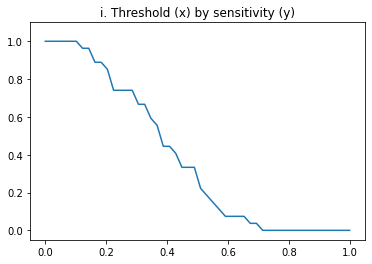

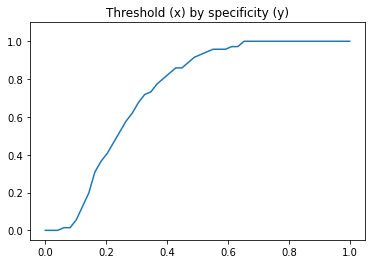

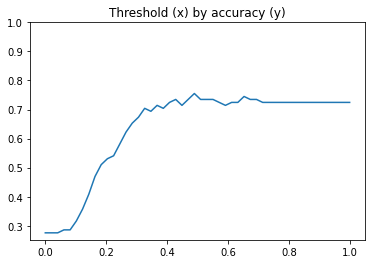

In [9]:
##part c: plots of thresholds
  
plt.figure()
plt.plot(np.linspace(0,1),Sensitivity)
plt.ylim(top=1.1)
plt.title('i. Threshold (x) by sensitivity (y)')

plt.figure()
plt.plot(np.linspace(0,1),Specificity)
plt.ylim(top=1.1)
plt.title('Threshold (x) by specificity (y)')

plt.figure()
plt.plot(np.linspace(0,1),Accuracy)
plt.ylim(top=1)
plt.title('Threshold (x) by accuracy (y)')


##Question 3

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
## this sets some style parameters
sns.set()

## Download in the data if it's not already there
! if [ ! -e oasis.csv ]; \
then wget https://raw.githubusercontent.com/jkrachm2/Data-Science/master/Class%20Final%20Project/RCQ_batted_ball.csv; \
fi;

## Read in the data and display a few rows
dat = pd.read_csv("https://raw.githubusercontent.com/jkrachm2/Data-Science/master/Class%20Final%20Project/RCQ_batted_ball.csv")

--2020-03-23 22:17:12--  https://raw.githubusercontent.com/jkrachm2/Data-Science/master/Class%20Final%20Project/RCQ_batted_ball.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 957545 (935K) [text/plain]
Saving to: ‘RCQ_batted_ball.csv’

RCQ_batted_ball.csv 100%[===================>] 935.10K  --.-KB/s    in 0.05s   

2020-03-23 22:17:13 (16.9 MB/s) - ‘RCQ_batted_ball.csv’ saved [957545/957545]



In [0]:
dat = dat.drop([ 'next_event_type', 'event_and_next_event_type', 'post_bat_score','is_hit_into_play', 'event_description', 'batter_name', 'pitcher_name', 'outs', 'balls','strikes','hit_trajectory','fld_score','bat_score', 'post_fld_score', 'post_fld_score', 'sport_id', 'game_pk', 'at_bat_number', 'event_inning','top_inning_sw','game_date'],\
             axis = 1)

In [13]:
dat.dropna(inplace=True)
dat.head(3)

,hc_x,hc_y,is_hit_into_play_basehit,bat_side,pitch_hand
0,138.03,75.69,0,R,R
1,207.14,139.24,0,R,R
2,44.29,95.55,1,R,R


In [14]:
dat["hc_x"] = dat["hc_x"].apply(lambda x: (x - 126))
dat["hc_x"] = dat["hc_x"].apply(lambda x: abs(x))
print (dat.head(3))

    hc_x    hc_y  is_hit_into_play_basehit bat_side pitch_hand
0  12.03   75.69                         0        R          R
1  81.14  139.24                         0        R          R
2  81.71   95.55                         1        R          R


In [0]:
dexter = {'L': 0,'R': 1}
hit = {1: 0,0: 1} #makes 0 a yes, hit. 1 is now no, not a hit.
dat.is_hit_into_play_basehit=[hit[item] for item in dat.is_hit_into_play_basehit]
dat.head(3)

In [0]:
x = dat[['hc_y']]
y= dat.is_hit_into_play_basehit
lr = lm.LogisticRegression(fit_intercept=True, solver='lbfgs') 
fit = lr.fit(x, y)

beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
[beta0, beta1]

n = 10000
xplot = np.linspace(0, 210, n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))

sns.scatterplot('hc_y', 'is_hit_into_play_basehit', data = dat, hue = 'is_hit_into_play_basehit')
sns.lineplot(xplot, p)

In [0]:
import sklearn.linear_model as lm
import sklearn as skl
from sklearn import linear_model
from sklearn import datasets

trainFraction = .75
sample = np.random.uniform(size = 2866) < trainFraction
trainingDat = dat[sample]
testingDat = dat[~sample]
xtrain = trainingDat[['hc_x','hc_y']]
ytrain = trainingDat[['is_hit_into_play_basehit']]

Logreg = linear_model.LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
Logreg.fit(xtrain, ytrain)
prediction = Logreg.predict(xtrain) 

In [0]:
import statsmodels.api as sm
from sklearn.datasets import make_blobs

import statsmodels.api as sm
logit_model=sm.Logit(ytrain,xtrain)
result=logit_model.fit()
print(result.summary2())

In [0]:
n = 0
ytrain = ytrain.to_numpy()
for i in range(len(prediction)):
  if prediction[i] == ytrain[i]:
    n = n + 1
Train_Accuracy = n / len(prediction)
print('The training accuracy= ' + str(Train_Accuracy))


In [0]:
xtest = testingDat[['hc_x','hc_y']]
ytest = testingDat[['is_hit_into_play_basehit']]
newprediction = Logreg.predict(xtest) 

n = 0
ytest = ytest.to_numpy()
for i in range(len(newprediction)):
  if newprediction[i] == ytest[i]:
    n = n + 1
Test_Accuracy = n / len(newprediction)
print('The testing accuracy= ' + str(Test_Accuracy))

In [0]:
new_2_Predicition = Logreg.predict_proba(xtest)
Accuracy = []
Sensitivity = []
Specificity = []
pos = float(np.sum(ytest))
neg = float(np.sum(1 - ytest))

for t in np.linspace(0,1):
  n0 = 0
  n1 = 0
  nC = 0
  for i in range(len(new_2_Predicition)):
    j = new_2_Predicition[i][1] > t
    if j == ytest[i]:
      nC = nC + 1
    if j == 0 and ytest[i]==0:
      n0 = n0 + 1
    if j == 1 and ytest[i] == 1:
      n1 = n1 + 1
  Sensitivity.append(n1/pos)
  Specificity.append(n0/neg)
  Accuracy.append(nC/len(new_2_Predicition))

In [0]:
plt.figure()
plt.plot(np.linspace(0,1),Sensitivity)
plt.ylim(top=1.1)
plt.title('i. Threshold (x) by sensitivity (y)')

plt.figure()
plt.plot(np.linspace(0,1),Specificity)
plt.ylim(top=1.1)
plt.title('Threshold (x) by specificity (y)')

plt.figure()
plt.plot(np.linspace(0,1),Accuracy)
plt.ylim(top=1)
plt.title('Threshold (x) by accuracy (y)')

Spec=[]
Spec[:] = [1-x for x in Specificity]
plt.figure()
plt.plot(Spec,Sensitivity)
plt.ylim(top=1.1)
plt.title('Sens by 1-specificity')